<a href="https://colab.research.google.com/github/VitorDaSilvaOliveira/Documentacao-Projeto/blob/main/TrabalhoESPA5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
## SCRIPT PARA A LIMPEZA E SELEÇÃO DAS COLUNAS QUE SERÃO UTILIZADAS
## A BASE DE DADOS INTEIRA SEM O NOSSO TRATAMENTO PODE SER ENCONTRADA NESSE LINK:
## https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/g62h-syeh

import pandas as pd
from google.colab import files

# 1. Envie o CSV
print("📁 Faça o upload do arquivo CSV:")
uploaded = files.upload()

# 2. Lê o arquivo (pega o nome automaticamente)
nome_arquivo = next(iter(uploaded))
df = pd.read_csv(nome_arquivo)

# 3. Converte a coluna 'date' para datetime
df['date'] = pd.to_datetime(df['date'])

# 4. Filtra pelas datas desejadas
inicio = pd.to_datetime("2020-03-01")
fim = pd.to_datetime("2022-06-18")
df = df[(df['date'] >= inicio) & (df['date'] <= fim)]

# 5. Colunas de interesse
colunas_originais = [
    "date",
    "critical_staffing_shortage_today_yes",
    "critical_staffing_shortage_today_no",
    "critical_staffing_shortage_anticipated_within_week_yes",
    "critical_staffing_shortage_anticipated_within_week_no",
    "previous_day_admission_adult_covid_confirmed",
    "staffed_icu_adult_patients_confirmed_covid",
    "total_pediatric_patients_hospitalized_confirmed_covid",
    "total_staffed_adult_icu_beds_coverage",
    "deaths_covid"
]

# 6. Tradução dos nomes para português
colunas_traduzidas = {
    "date": "data",
    "critical_staffing_shortage_today_yes": "hospitais_relataram_estado_critico",
    "critical_staffing_shortage_today_no": "hospitais_relataram_estado_nao_critico",
    "critical_staffing_shortage_anticipated_within_week_yes": "hospitais_previram_estado_critico",
    "previous_day_admission_adult_covid_confirmed": "admissoes_adultos_covid_confirmado",
    "staffed_icu_adult_patients_confirmed_covid": "pacientes_uti_adultos_covid_confirmado",
    "total_pediatric_patients_hospitalized_confirmed_covid": "internacoes_pediatricas_covid_confirmado",
    "total_staffed_adult_icu_beds_coverage": "total_leitos_uti_adultos",
    "deaths_covid": "mortes_covid"
}

# 7. Filtra e renomeia
df_filtrado = df[colunas_originais].rename(columns=colunas_traduzidas)

# 8. Agrupa por data (somando valores de todos os estados)
df_agrupado = df_filtrado.groupby("data", as_index=False).sum()

# 9. Exporta CSV
nome_saida = "hospitalizacoes_tratado.csv"
df_agrupado.to_csv(nome_saida, index=False)

# 10. Baixar arquivo
files.download(nome_saida)

📁 Faça o upload do arquivo CSV:


Saving COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries__RAW__20250706.csv to COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries__RAW__20250706.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
## SCRIPT PARA A LIMPEZA E SELEÇÃO DAS COLUNAS QUE SERÃO UTILIZADAS
## A BASE DE DADOS INTEIRA SEM O NOSSO TRATAMENTO PODE SER ENCONTRADA NESSE LINK:
## https://github.com/owid/covid-19-data/blob/master/public/data/testing/covid-testing-all-observations.csv

import pandas as pd
from google.colab import files

# 1. Upload do CSV
print("📁 Faça o upload do arquivo CSV de testagens:")
uploaded = files.upload()
nome_arquivo = next(iter(uploaded))

# 2. Lê o CSV
df = pd.read_csv(nome_arquivo)

# 3. Filtra apenas registros dos EUA (linha específica)
df = df[df['Entity'] == "United States - tests performed"]

# 4. Seleciona e renomeia as colunas
colunas_para_manter = {
    "Date": "data",
    "Cumulative total": "total_testes_acumulado",
    "Daily change in cumulative total": "testes_diarios",
    "7-day smoothed daily change": "media_movel_testes_diarios",
    "Short-term positive rate": "taxa_positividade_curto_prazo",
    "Short-term tests per case": "testes_por_caso_curto_prazo"
}

df_filtrado = df[list(colunas_para_manter.keys())].rename(columns=colunas_para_manter)

# 5. Converte a coluna de data para formato YYYY-MM-DD
df_filtrado["data"] = pd.to_datetime(df_filtrado["data"]).dt.strftime("%Y-%m-%d")

# 7. Exporta para CSV
nome_saida = "testagem_tratado.csv"
df_filtrado.to_csv(nome_saida, index=False)
files.download(nome_saida)

📁 Faça o upload do arquivo CSV de testagens:


Saving covid-testing-all-observations.csv to covid-testing-all-observations.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import pandas as pd
from google.colab import files

# 1. Upload do arquivo de hospitalizações
print("📁 Faça o upload de 'hospitalizacoes_tratado.csv':")
uploaded_hosp = files.upload()
arq_hosp = next(iter(uploaded_hosp))
df_hosp = pd.read_csv(arq_hosp)

# 2. Upload do arquivo de testagem
print("📁 Agora faça o upload de 'testagem_tratado.csv':")
uploaded_test = files.upload()
arq_test = next(iter(uploaded_test))
df_test = pd.read_csv(arq_test)

# 3. Converte a coluna 'data' para datetime
df_hosp['data'] = pd.to_datetime(df_hosp['data'])
df_test['data'] = pd.to_datetime(df_test['data'])

# 4. Faz o merge pelas datas (interseção de datas nas duas bases)
df_merged = pd.merge(df_hosp, df_test, on='data', how='inner')

# 5. Exporta o CSV final
nome_saida = "dados_unificados.csv"
df_merged.to_csv(nome_saida, index=False)
files.download(nome_saida)

📁 Faça o upload de 'hospitalizacoes_tratado.csv':


Saving hospitalizacoes_tratado.csv to hospitalizacoes_tratado (2).csv
📁 Agora faça o upload de 'testagem_tratado.csv':


Saving testagem_tratado.csv to testagem_tratado (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📌 Estatísticas sobre mortes por COVID:
Média de mortes por dia: 801.4761904761905
Desvio padrão: 619.8066863107255
Máximo de mortes em um dia: 2795.0

📌 Total acumulado de testes no último dia registrado:
Total acumulado: 912769124.0

📌 Estatísticas dos testes diários:
count    8.400000e+02
mean     1.086630e+06
std      5.971515e+05
min      3.480000e+02
25%      6.613455e+05
50%      1.011313e+06
75%      1.496003e+06
max      3.201706e+06
Name: testes_diarios, dtype: float64

📌 Taxa de positividade dos testes:
Média: 0.08531534772182255
Proporção de dias com positividade > 10%: 0.30238095238095236

📌 Proporção de hospitais em estado crítico:
Média da proporção: 0.14019890633244453

📌 Estatísticas de internações:
       admissoes_adultos_covid_confirmado  \
count                          840.000000   
mean                          5812.214286   
std                           4938.109151   
min                              0.000000   
25%                           2175.250000   
50%  

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


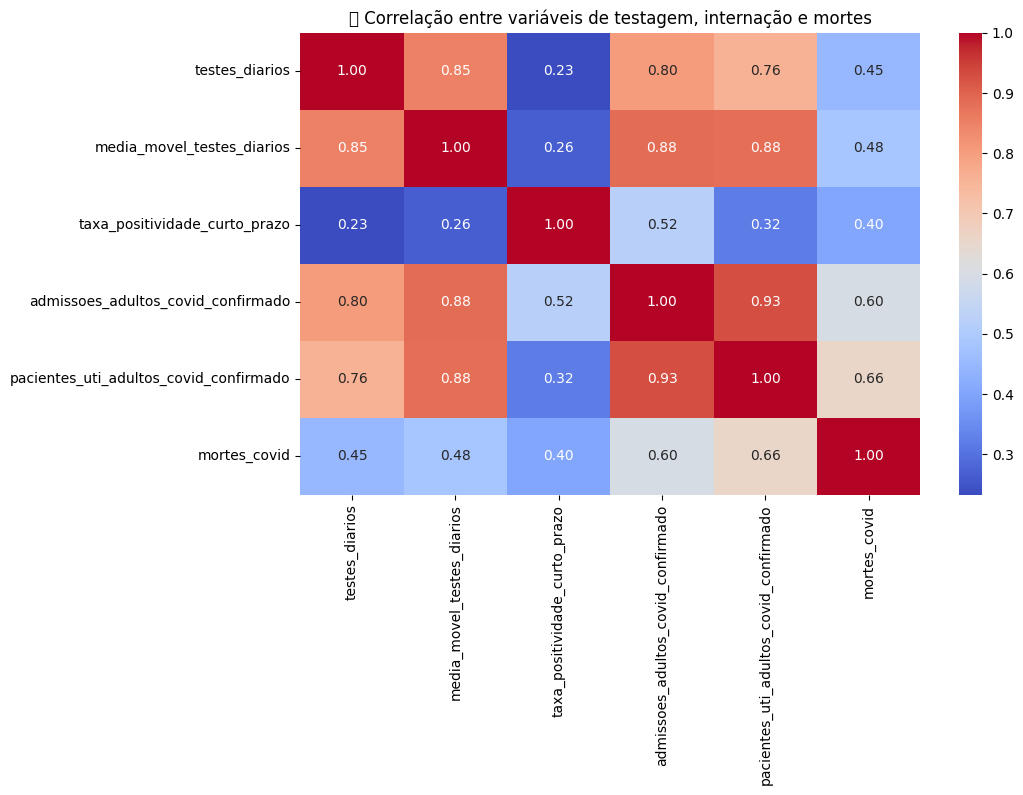

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ⛔ Certifique-se de já ter carregado a base unificada em um DataFrame chamado `df`
# Caso não tenha feito, suba o arquivo unificado:
# df = pd.read_csv("dados_unificados.csv")
# df['data'] = pd.to_datetime(df['data'])

# ========================
# 1. MORTES POR COVID
# ========================
print("📌 Estatísticas sobre mortes por COVID:")
print("Média de mortes por dia:", df_merged['mortes_covid'].mean())
print("Desvio padrão:", df_merged['mortes_covid'].std())
print("Máximo de mortes em um dia:", df_merged['mortes_covid'].max())

# ========================
# 2. TOTAL DE TESTES
# ========================
print("\n📌 Total acumulado de testes no último dia registrado:")
print("Total acumulado:", df_merged['total_testes_acumulado'].dropna().iloc[-1])

# ========================
# 3. TESTES DIÁRIOS
# ========================
print("\n📌 Estatísticas dos testes diários:")
print(df_merged['testes_diarios'].describe())

# ========================
# 4. TAXA DE POSITIVIDADE
# ========================
print("\n📌 Taxa de positividade dos testes:")
print("Média:", df_merged['taxa_positividade_curto_prazo'].mean())
print("Proporção de dias com positividade > 10%:",
      (df_merged['taxa_positividade_curto_prazo'] > 0.10).mean())

# ========================
# 5. PROPORÇÃO DE HOSPITAIS EM ESTADO CRÍTICO
# ========================
print("\n📌 Proporção de hospitais em estado crítico:")
df_merged['proporcao_critico'] = df_merged['hospitais_relataram_estado_critico'] / (
    df_merged['hospitais_relataram_estado_critico'] + df_merged['hospitais_relataram_estado_nao_critico']
)
print("Média da proporção:", df_merged['proporcao_critico'].mean())

# ========================
# 6. INTERNAÇÕES HOSPITALARES
# ========================
print("\n📌 Estatísticas de internações:")
variaveis = [
    'admissoes_adultos_covid_confirmado',
    'pacientes_uti_adultos_covid_confirmado',
    'internacoes_pediatricas_covid_confirmado'
]
print(df_merged[variaveis].describe())

# ========================
# 7. LEITOS DE UTI
# ========================
print("\n📌 Capacidade média de leitos de UTI:")
print("Média de leitos disponíveis:", df_merged['total_leitos_uti_adultos'].mean())

# ========================
# 8. COEFICIENTE DE VARIAÇÃO
# ========================
print("\n📌 Coeficiente de variação (CV):")
for col in ['mortes_covid', 'testes_diarios', 'admissoes_adultos_covid_confirmado']:
    media = df_merged[col].mean()
    desvio = df_merged[col].std()
    cv = desvio / media
    print(f"{col}: {cv:.2f}")

# ========================
# 9. HEATMAP DE CORRELAÇÃO
# ========================
print("\n📌 Correlação entre variáveis principais:")
colunas_correlacao = [
    'testes_diarios',
    'media_movel_testes_diarios',
    'taxa_positividade_curto_prazo',
    'admissoes_adultos_covid_confirmado',
    'pacientes_uti_adultos_covid_confirmado',
    'mortes_covid'
]
correlacao = df_merged[colunas_correlacao].corr()

# Visualização
plt.figure(figsize=(10, 6))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("📊 Correlação entre variáveis de testagem, internação e mortes")
plt.show()

📊 Estatísticas descritivas de mortes por COVID (toda a série temporal):

🧮 Média de mortes por dia: 801.48
📊 Total de mortes: 673240.0
🔸 Mediana: 629.5
📈 Máximo de mortes em um dia: 2795.0 (em 2020-05-23T00:00:00.000000000)
📉 Mínimo de mortes em um dia (após ultrapassar média): 70.0 (em 2022-04-23T00:00:00.000000000)
📐 Desvio padrão: 619.81
📏 Amplitude (máximo - mínimo ajustado): 2725.0
📈 Análise sobre dias com mortes acima da média:

📍 Primeiro dia com mortes acima da média (801.48): 2020-04-02
📍 Último dia com mortes acima da média: 2022-02-17
📆 Total de dias com mortes acima da média: 361 dias


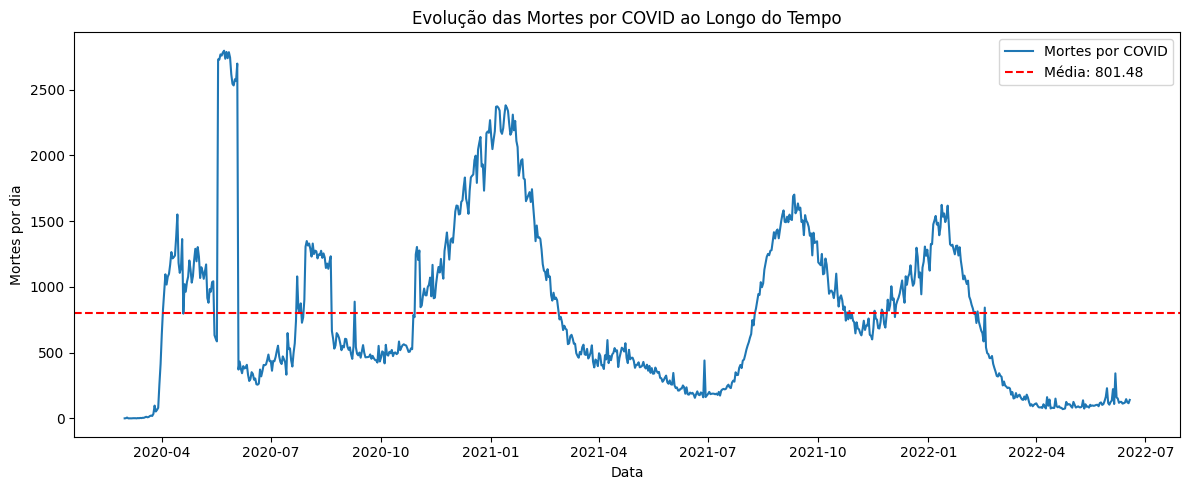

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Certifique-se de já ter a base carregada no DataFrame df
# df = pd.read_csv("dados_unificados.csv")
# df["data"] = pd.to_datetime(df["data"])

# 🔹 Ordena cronologicamente
df = df.sort_values("data")

# ================================
# 📊 ESTATÍSTICAS DESCRITIVAS
# ================================
media_mortes = df["mortes_covid"].mean()
total_mortes = df["mortes_covid"].sum()
mediana_mortes = df["mortes_covid"].median()
max_mortes = df["mortes_covid"].max()

# Calcula o mínimo APÓS a primeira vez que mortes ultrapassaram a média
primeiro_dia_acima_media = df[df["mortes_covid"] > media_mortes]["data"].iloc[0]
df_apos_media = df[df["data"] >= primeiro_dia_acima_media]
min_mortes = df_apos_media["mortes_covid"].min()
dia_min = df_apos_media[df_apos_media["mortes_covid"] == min_mortes]["data"].values[0]

desvio_mortes = df["mortes_covid"].std()
amplitude_mortes = max_mortes - min_mortes

# 🔸 Recalcula a média de mortes
media_mortes = df["mortes_covid"].mean()

# 🔍 Filtra os dias com mortes acima da média
acima_da_media = df[df["mortes_covid"] > media_mortes]

# 📅 Primeiro e último dia acima da média
primeiro_dia = acima_da_media["data"].iloc[0]
ultimo_dia = acima_da_media["data"].iloc[-1]

# 🔢 Total de dias com mortes acima da média
total_dias_acima = acima_da_media.shape[0]

# ================================
# 📋 EXIBE OS RESULTADOS
# ================================
print("📊 Estatísticas descritivas de mortes por COVID (toda a série temporal):\n")
print(f"🧮 Média de mortes por dia: {media_mortes:.2f}")
print(f"📊 Total de mortes: {total_mortes}")
print(f"🔸 Mediana: {mediana_mortes}")
print(f"📈 Máximo de mortes em um dia: {max_mortes} (em {df[df['mortes_covid'] == max_mortes]['data'].values[0]})")
print(f"📉 Mínimo de mortes em um dia (após ultrapassar média): {min_mortes} (em {dia_min})")
print(f"📐 Desvio padrão: {desvio_mortes:.2f}")
print(f"📏 Amplitude (máximo - mínimo ajustado): {amplitude_mortes}")
print("📈 Análise sobre dias com mortes acima da média:\n")
print(f"📍 Primeiro dia com mortes acima da média ({media_mortes:.2f}): {primeiro_dia.date()}")
print(f"📍 Último dia com mortes acima da média: {ultimo_dia.date()}")
print(f"📆 Total de dias com mortes acima da média: {total_dias_acima} dias")
# ================================
# 📊 GRÁFICO DE LINHA
# ================================
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="data", y="mortes_covid", label="Mortes por COVID")
plt.axhline(media_mortes, color='red', linestyle='--', label=f'Média: {media_mortes:.2f}')
plt.title("Evolução das Mortes por COVID ao Longo do Tempo")
plt.ylabel("Mortes por dia")
plt.xlabel("Data")
plt.legend()
plt.tight_layout()
plt.show()


📊 Estatísticas descritivas de admissões hospitalares de adultos com COVID:

🧮 Média de admissões por dia: 5812.21
📊 Total de admissões: 4882260.0
🔸 Mediana: 4705.5
📈 Máximo de admissões em um dia: 22451.0 (em 2022-01-14T00:00:00.000000000)
📉 Mínimo após primeira vez que passou da média: 1121.0 (em 2022-04-03T00:00:00.000000000)
📐 Desvio padrão: 4938.11
📏 Amplitude (máximo - mínimo ajustado): 21330.0
📈 Análise sobre dias com admissões acima da média:

📍 Primeiro dia acima da média: 2020-07-28
📍 Último dia acima da média: 2022-02-18
📆 Total de dias acima da média: 305 dias


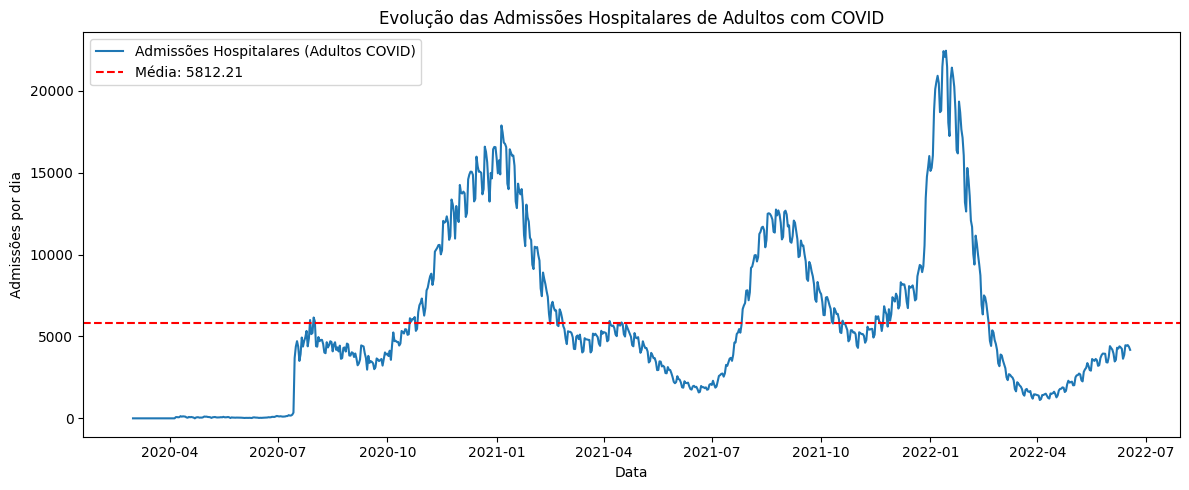

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Ordena cronologicamente
df = df.sort_values("data")

# ================================
# 📊 ESTATÍSTICAS DESCRITIVAS
# ================================
media_admissoes = df["admissoes_adultos_covid_confirmado"].mean()
total_admissoes = df["admissoes_adultos_covid_confirmado"].sum()
mediana_admissoes = df["admissoes_adultos_covid_confirmado"].median()
max_admissoes = df["admissoes_adultos_covid_confirmado"].max()

# Calcula o mínimo após a primeira vez que as admissões ultrapassaram a média
primeiro_dia_acima_media = df[df["admissoes_adultos_covid_confirmado"] > media_admissoes]["data"].iloc[0]
df_apos_media = df[df["data"] >= primeiro_dia_acima_media]
min_admissoes = df_apos_media["admissoes_adultos_covid_confirmado"].min()
dia_min = df_apos_media[df_apos_media["admissoes_adultos_covid_confirmado"] == min_admissoes]["data"].values[0]

desvio_admissoes = df["admissoes_adultos_covid_confirmado"].std()
amplitude_admissoes = max_admissoes - min_admissoes

# 🔍 Filtra os dias com admissões acima da média
acima_da_media = df[df["admissoes_adultos_covid_confirmado"] > media_admissoes]
primeiro_dia = acima_da_media["data"].iloc[0]
ultimo_dia = acima_da_media["data"].iloc[-1]
total_dias_acima = acima_da_media.shape[0]

# ================================
# 📋 EXIBE OS RESULTADOS
# ================================
print("📊 Estatísticas descritivas de admissões hospitalares de adultos com COVID:\n")
print(f"🧮 Média de admissões por dia: {media_admissoes:.2f}")
print(f"📊 Total de admissões: {total_admissoes}")
print(f"🔸 Mediana: {mediana_admissoes}")
print(f"📈 Máximo de admissões em um dia: {max_admissoes} (em {df[df['admissoes_adultos_covid_confirmado'] == max_admissoes]['data'].values[0]})")
print(f"📉 Mínimo após primeira vez que passou da média: {min_admissoes} (em {dia_min})")
print(f"📐 Desvio padrão: {desvio_admissoes:.2f}")
print(f"📏 Amplitude (máximo - mínimo ajustado): {amplitude_admissoes}")
print("📈 Análise sobre dias com admissões acima da média:\n")
print(f"📍 Primeiro dia acima da média: {primeiro_dia.date()}")
print(f"📍 Último dia acima da média: {ultimo_dia.date()}")
print(f"📆 Total de dias acima da média: {total_dias_acima} dias")

# ================================
# 📊 GRÁFICO DE LINHA
# ================================
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="data", y="admissoes_adultos_covid_confirmado", label="Admissões Hospitalares (Adultos COVID)")
plt.axhline(media_admissoes, color='red', linestyle='--', label=f'Média: {media_admissoes:.2f}')
plt.title("Evolução das Admissões Hospitalares de Adultos com COVID")
plt.ylabel("Admissões por dia")
plt.xlabel("Data")
plt.legend()
plt.tight_layout()
plt.show()


📊 Estatísticas descritivas dos hospitais em estado crítico de lotação:

🧮 Média por dia: 627.42 hospitais
📊 Total acumulado: 527032
🔸 Mediana: 677.5
📈 Máximo em um dia: 1270 (em 2020-12-24T00:00:00.000000000)
📉 Mínimo em um dia: 0 (em 2020-03-01T00:00:00.000000000)
📐 Desvio padrão: 372.19
📏 Amplitude (máximo - mínimo): 1270


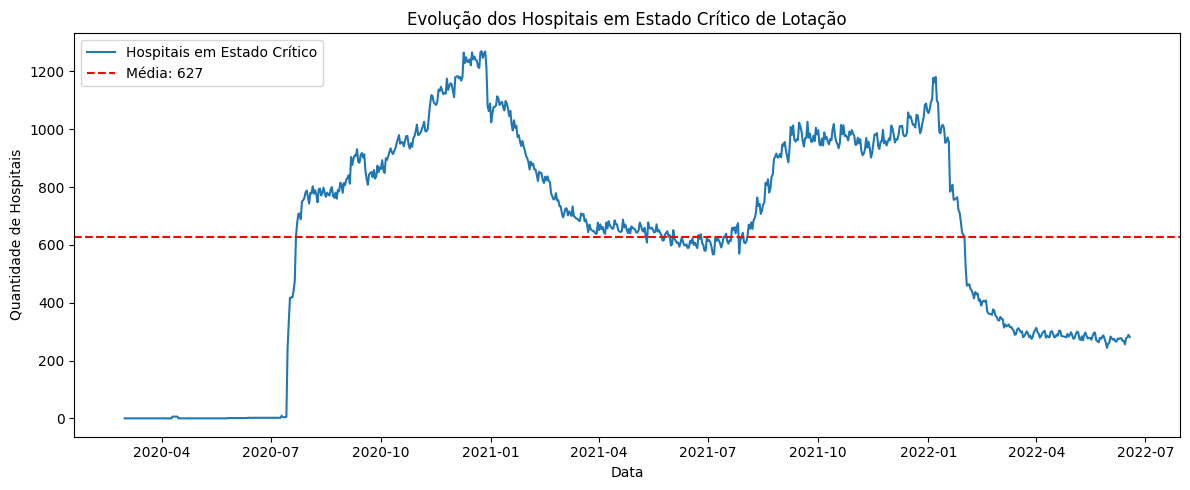

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Certifique-se de já ter carregado o DataFrame df com a coluna 'hospitais_relataram_estado_critico'
# df = pd.read_csv("dados_unificados.csv")
# df["data"] = pd.to_datetime(df["data"])

# 🔹 Ordena por data
df = df.sort_values("data")

# ================================
# 📊 ESTATÍSTICAS DESCRITIVAS
# ================================
media_critico = df["hospitais_relataram_estado_critico"].mean()
total_critico = df["hospitais_relataram_estado_critico"].sum()
mediana_critico = df["hospitais_relataram_estado_critico"].median()
max_critico = df["hospitais_relataram_estado_critico"].max()
min_critico = df["hospitais_relataram_estado_critico"].min()
desvio_critico = df["hospitais_relataram_estado_critico"].std()
amplitude_critico = max_critico - min_critico

# 📅 Dias com valores extremos
dia_max = df[df["hospitais_relataram_estado_critico"] == max_critico]["data"].values[0]
dia_min = df[df["hospitais_relataram_estado_critico"] == min_critico]["data"].values[0]

# ================================
# 📋 EXIBE RESULTADOS
# ================================
print("📊 Estatísticas descritivas dos hospitais em estado crítico de lotação:\n")
print(f"🧮 Média por dia: {media_critico:.2f} hospitais")
print(f"📊 Total acumulado: {total_critico}")
print(f"🔸 Mediana: {mediana_critico}")
print(f"📈 Máximo em um dia: {max_critico} (em {dia_max})")
print(f"📉 Mínimo em um dia: {min_critico} (em {dia_min})")
print(f"📐 Desvio padrão: {desvio_critico:.2f}")
print(f"📏 Amplitude (máximo - mínimo): {amplitude_critico}")

# ================================
# 📈 GRÁFICO DE LINHA
# ================================
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="data", y="hospitais_relataram_estado_critico", label="Hospitais em Estado Crítico")
plt.axhline(media_critico, color='red', linestyle='--', label=f'Média: {media_critico:.2f}')
plt.title("Evolução dos Hospitais em Estado Crítico de Lotação")
plt.ylabel("Quantidade de Hospitais")
plt.xlabel("Data")
plt.legend()
plt.tight_layout()
plt.show()


📊 Estatísticas descritivas de Testes Diários para COVID nos EUA:

🧮 Média de testes por dia: 1086629.91
📊 Total acumulado de testes diários: 912769124
🔸 Mediana: 1011313.0
📈 Máximo em um dia: 3201706.0 (em 2022-01-05T00:00:00.000000000)
📉 Mínimo em um dia: 348.0 (em 2020-03-01T00:00:00.000000000)
📐 Desvio padrão: 597151.46
📏 Amplitude (máximo - mínimo): 3201358.0


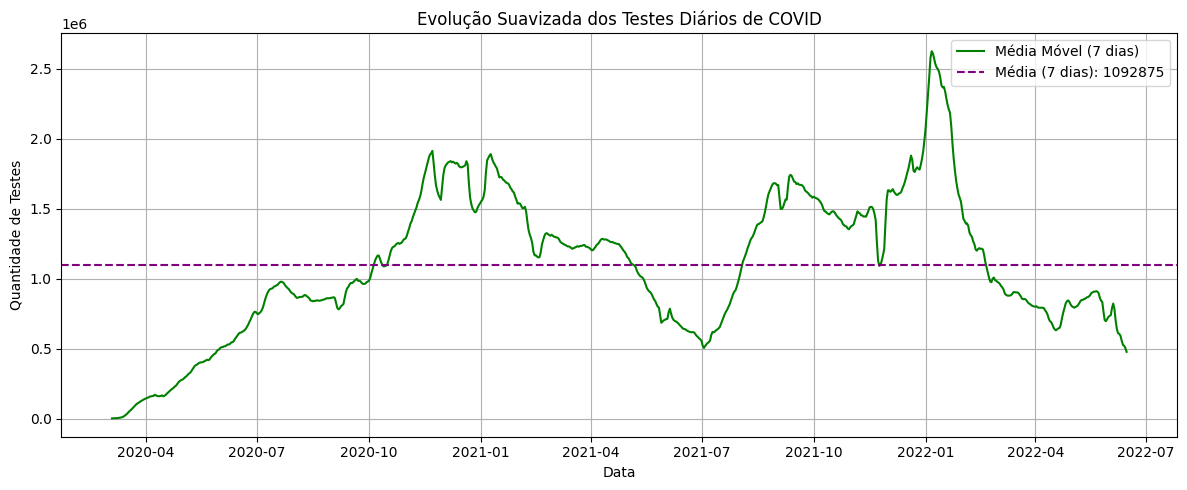

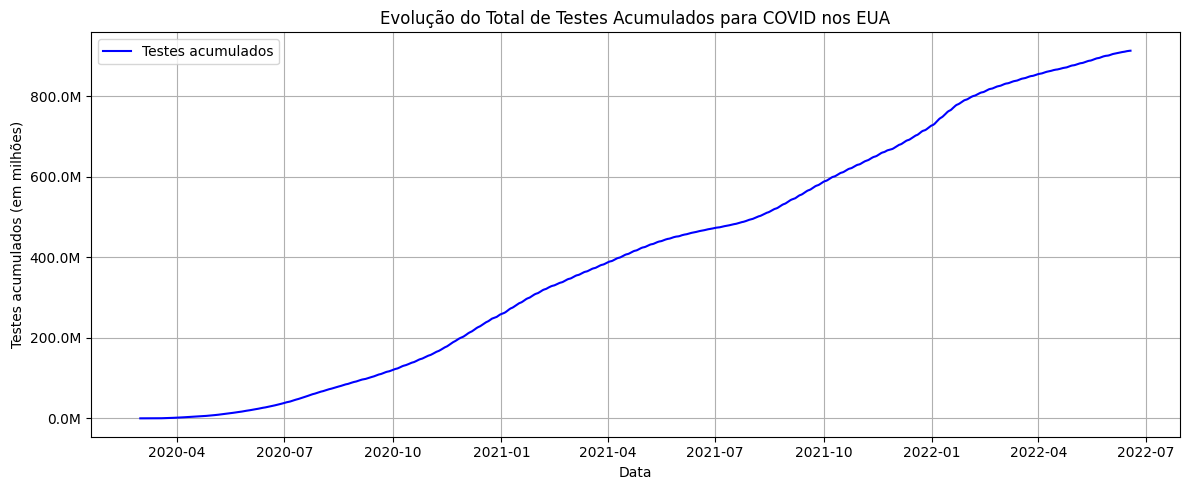

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Certifique-se de já ter carregado o DataFrame df com a coluna 'testes_diarios'
# df = pd.read_csv("dados_unificados.csv")
# df["data"] = pd.to_datetime(df["data"])

# 🔹 Ordena por data
df = df.sort_values("data")

# ================================
# 📊 ESTATÍSTICAS DESCRITIVAS
# ================================
media_testes = df["testes_diarios"].mean()
total_testes = df["testes_diarios"].sum()
mediana_testes = df["testes_diarios"].median()
max_testes = df["testes_diarios"].max()
min_testes = df["testes_diarios"].min()
desvio_testes = df["testes_diarios"].std()
amplitude_testes = max_testes - min_testes

# 📅 Dias com valores extremos
dia_max = df[df["testes_diarios"] == max_testes]["data"].values[0]
dia_min = df[df["testes_diarios"] == min_testes]["data"].values[0]

# ================================
# 📋 EXIBE RESULTADOS
# ================================
print("📊 Estatísticas descritivas de Testes Diários para COVID nos EUA:\n")
print(f"🧮 Média de testes por dia: {media_testes:.2f}")
print(f"📊 Total acumulado de testes diários: {total_testes:.0f}")
print(f"🔸 Mediana: {mediana_testes}")
print(f"📈 Máximo em um dia: {max_testes} (em {dia_max})")
print(f"📉 Mínimo em um dia: {min_testes} (em {dia_min})")
print(f"📐 Desvio padrão: {desvio_testes:.2f}")
print(f"📏 Amplitude (máximo - mínimo): {amplitude_testes}")

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# 🔹 Ordena por data
df = df.sort_values("data")

# 🔸 Aplica média móvel de 7 dias para suavizar
df["testes_diarios_suave"] = df["testes_diarios"].rolling(window=7, center=True).mean()
media_suavizada = df["testes_diarios_suave"].mean()

# ================================
# 📈 GRÁFICO DE TESTES DIÁRIOS SUAVIZADOS
# ================================
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="data", y="testes_diarios_suave", label="Média Móvel (7 dias)", color="green")
plt.axhline(media_suavizada, color='purple', linestyle='--', label=f'Média (7 dias): {media_suavizada:.0f}')
plt.title("Evolução Suavizada dos Testes Diários de COVID")
plt.ylabel("Quantidade de Testes")
plt.xlabel("Data")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# ================================
# 📈 GRÁFICO DE TESTES CUMULATIVOS
# ================================
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="data", y="total_testes_acumulado", color="blue", label="Testes acumulados")

# Formata eixo Y para milhões
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

plt.title("Evolução do Total de Testes Acumulados para COVID nos EUA")
plt.xlabel("Data")
plt.ylabel("Testes acumulados (em milhões)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


🔍 Distribuição de dias por quadrante (sem lag):

Baixa positividade + Alto estado crítico: 321 dias
Baixa positividade + Baixo estado crítico: 318 dias
Alta positividade + Baixo estado crítico: 102 dias
Alta positividade + Alto estado crítico: 99 dias

📈 Percentuais:
Baixa positividade + Alto estado crítico: 38.21%
Baixa positividade + Baixo estado crítico: 37.86%
Alta positividade + Baixo estado crítico: 12.14%
Alta positividade + Alto estado crítico: 11.79%


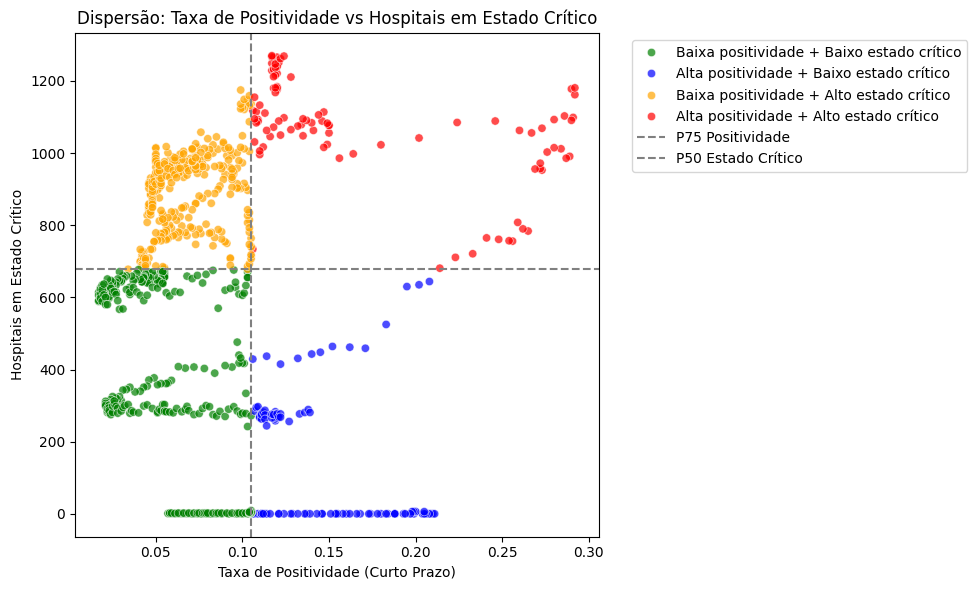

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Garante que os dados estão ordenados
df = df.sort_values("data")

# 📌 Calcula os limiares
limiar_positividade = df["taxa_positividade_curto_prazo"].quantile(0.75)
limiar_critico = df["hospitais_relataram_estado_critico"].quantile(0.50)

# 🧮 Categorização dos quadrantes
def classificar_quadrante(row):
    pos_alta = row["taxa_positividade_curto_prazo"] > limiar_positividade
    critico_alto = row["hospitais_relataram_estado_critico"] > limiar_critico

    if not pos_alta and not critico_alto:
        return "Baixa positividade + Baixo estado crítico"
    elif not pos_alta and critico_alto:
        return "Baixa positividade + Alto estado crítico"
    elif pos_alta and not critico_alto:
        return "Alta positividade + Baixo estado crítico"
    else:
        return "Alta positividade + Alto estado crítico"

# 🧷 Aplica classificação
df["quadrante"] = df.apply(classificar_quadrante, axis=1)

# 🔢 Conta os casos em cada quadrante
contagem = df["quadrante"].value_counts().sort_values(ascending=False)

# 📋 Exibe contagem e percentuais
print("🔍 Distribuição de dias por quadrante (sem lag):\n")
for nome, valor in contagem.items():
    print(f"{nome}: {valor} dias")

total_validos = contagem.sum()
print("\n📈 Percentuais:")
for nome, valor in contagem.items():
    percentual = valor / total_validos * 100
    print(f"{nome}: {percentual:.2f}%")

# ================================
# 📈 Gráfico de dispersão com quadrantes
# ================================
palette = {
    "Baixa positividade + Baixo estado crítico": "green",
    "Baixa positividade + Alto estado crítico": "orange",
    "Alta positividade + Baixo estado crítico": "blue",
    "Alta positividade + Alto estado crítico": "red",
}

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="taxa_positividade_curto_prazo",
    y="hospitais_relataram_estado_critico",
    hue="quadrante",
    palette=palette,
    alpha=0.7
)

plt.axvline(limiar_positividade, color='gray', linestyle='--', label='P75 Positividade')
plt.axhline(limiar_critico, color='gray', linestyle='--', label='P50 Estado Crítico')

plt.title("Dispersão: Taxa de Positividade vs Hospitais em Estado Crítico")
plt.xlabel("Taxa de Positividade (Curto Prazo)")
plt.ylabel("Hospitais em Estado Crítico")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Correlação entre testes diários e admissões hospitalares (lag 0): 0.802
Correlação entre testes diários e admissões hospitalares (lag 7): 0.793


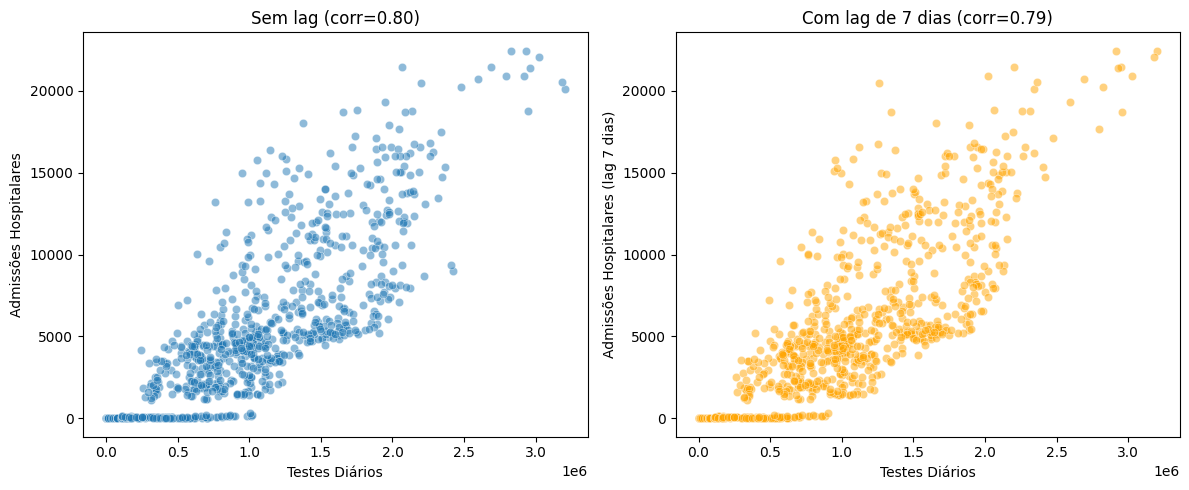

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# DataFrame df deve conter as colunas:
# "testes_diarios" (número de testes no dia)
# "admissoes_adultos_covid_confirmado" (admissões hospitalares diárias)

# Garantindo ordenação
df = df.sort_values("data").reset_index(drop=True)

# Correlação sem lag (lag 0)
corr_lag0 = df["testes_diarios"].corr(df["admissoes_adultos_covid_confirmado"])

# Criando coluna de admissões deslocada 7 dias para trás (lag 7)
df["admissoes_lag7"] = df["admissoes_adultos_covid_confirmado"].shift(-7)

# Remove linhas com NaN resultantes do shift
df_lag7 = df.dropna(subset=["admissoes_lag7"])

# Correlação com lag 7
corr_lag7 = df_lag7["testes_diarios"].corr(df_lag7["admissoes_lag7"])

print(f"Correlação entre testes diários e admissões hospitalares (lag 0): {corr_lag0:.3f}")
print(f"Correlação entre testes diários e admissões hospitalares (lag 7): {corr_lag7:.3f}")

# Gráfico comparativo
plt.figure(figsize=(12,5))

# Scatter lag 0
plt.subplot(1,2,1)
sns.scatterplot(x=df["testes_diarios"], y=df["admissoes_adultos_covid_confirmado"], alpha=0.5)
plt.title(f"Sem lag (corr={corr_lag0:.2f})")
plt.xlabel("Testes Diários")
plt.ylabel("Admissões Hospitalares")

# Scatter lag 7
plt.subplot(1,2,2)
sns.scatterplot(x=df_lag7["testes_diarios"], y=df_lag7["admissoes_lag7"], alpha=0.5, color="orange")
plt.title(f"Com lag de 7 dias (corr={corr_lag7:.2f})")
plt.xlabel("Testes Diários")
plt.ylabel("Admissões Hospitalares (lag 7 dias)")

plt.tight_layout()
plt.show()


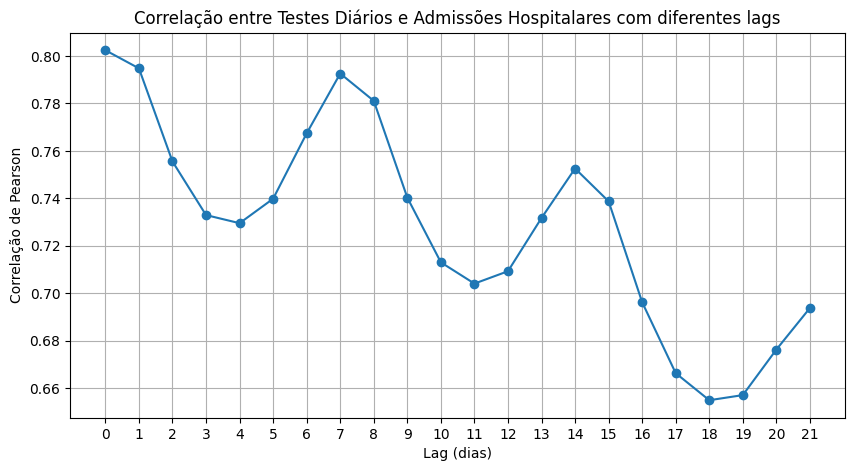

In [49]:
import matplotlib.pyplot as plt

# Garantir ordenação do DataFrame
df = df.sort_values("data").reset_index(drop=True)

lags = range(0, 22)  # de 0 a 21 dias
correlacoes = []

for lag in lags:
    # Cria coluna de admissões deslocada (lag)
    df[f"admissoes_lag_{lag}"] = df["admissoes_adultos_covid_confirmado"].shift(-lag)
    # Remove NaNs causados pelo shift
    df_lag = df.dropna(subset=[f"admissoes_lag_{lag}"])
    # Calcula correlação
    corr = df_lag["testes_diarios"].corr(df_lag[f"admissoes_lag_{lag}"])
    correlacoes.append(corr)

# Plot da correlação vs lag
plt.figure(figsize=(10, 5))
plt.plot(lags, correlacoes, marker='o')
plt.title("Correlação entre Testes Diários e Admissões Hospitalares com diferentes lags")
plt.xlabel("Lag (dias)")
plt.ylabel("Correlação de Pearson")
plt.xticks(lags)
plt.grid(True)
plt.show()


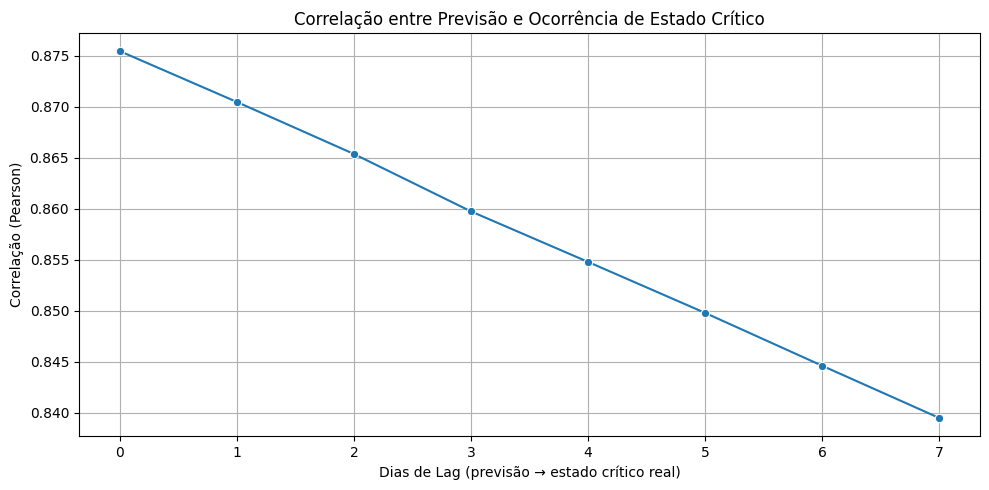

🔍 Melhor correlação: 0.875 com lag de 0 dias


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🔄 Ordena os dados por data
df = df.sort_values("data").reset_index(drop=True)

# Armazena os coeficientes de correlação
lags = range(0, 8)  # 0 a 7 dias
correlacoes = []

for lag in lags:
    df_temp = df.copy()
    df_temp["estado_critico_futuro"] = df_temp["hospitais_relataram_estado_critico"].shift(-lag)
    df_temp = df_temp.dropna(subset=["estado_critico_futuro"])
    corr = df_temp["hospitais_previram_estado_critico"].corr(df_temp["estado_critico_futuro"])
    correlacoes.append(corr)

# 📊 Plotando
plt.figure(figsize=(10,5))
sns.lineplot(x=lags, y=correlacoes, marker='o')
plt.title("Correlação entre Previsão e Ocorrência de Estado Crítico")
plt.xlabel("Dias de Lag (previsão → estado crítico real)")
plt.ylabel("Correlação (Pearson)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📝 Melhor correlação
melhor_lag = lags[correlacoes.index(max(correlacoes))]
print(f"🔍 Melhor correlação: {max(correlacoes):.3f} com lag de {melhor_lag} dias")


📈 Correlação sem lag: 0.233
📈 Correlação com lag de 3 dias: 0.226


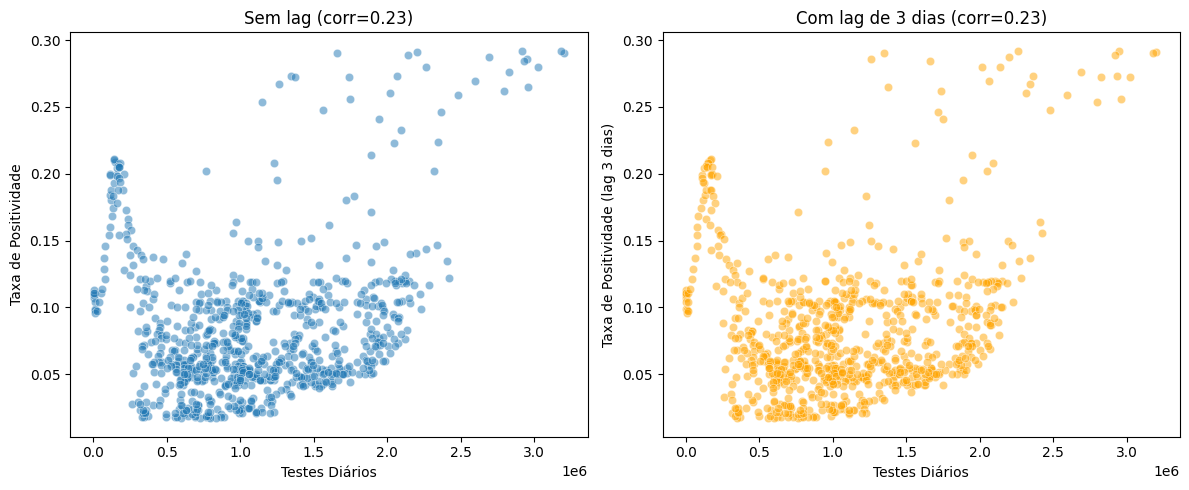

In [51]:
# 🔄 Ordena os dados por data
df = df.sort_values("data").reset_index(drop=True)

# Correlação direta (sem lag)
corr_sem_lag = df["testes_diarios"].corr(df["taxa_positividade_curto_prazo"])

# Correlação com lag (positividade 3 dias após testagem)
df["positividade_lag3"] = df["taxa_positividade_curto_prazo"].shift(-3)
df_lagged = df.dropna(subset=["positividade_lag3"])
corr_com_lag = df_lagged["testes_diarios"].corr(df_lagged["positividade_lag3"])

print(f"📈 Correlação sem lag: {corr_sem_lag:.3f}")
print(f"📈 Correlação com lag de 3 dias: {corr_com_lag:.3f}")

# 🔵 Scatter sem lag
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x=df["testes_diarios"], y=df["taxa_positividade_curto_prazo"], alpha=0.5)
plt.title(f"Sem lag (corr={corr_sem_lag:.2f})")
plt.xlabel("Testes Diários")
plt.ylabel("Taxa de Positividade")

# 🟠 Scatter com lag
plt.subplot(1,2,2)
sns.scatterplot(x=df_lagged["testes_diarios"], y=df_lagged["positividade_lag3"], alpha=0.5, color='orange')
plt.title(f"Com lag de 3 dias (corr={corr_com_lag:.2f})")
plt.xlabel("Testes Diários")
plt.ylabel("Taxa de Positividade (lag 3 dias)")

plt.tight_layout()
plt.show()


    lag        chi2        p_valor  p_real_alto_dado_prev_alto  \
0     0  469.507424  4.101636e-104                    0.875895   
1     1  462.612143  1.298516e-102                    0.873508   
2     2  455.759159  4.025137e-101                    0.871122   
3     3  448.948590   1.221609e-99                    0.868735   
4     4  442.180553   3.629748e-98                    0.866348   
5     5  435.455170   1.055815e-96                    0.863962   
6     6  428.772563   3.006357e-95                    0.861575   
7     7  422.132856   8.379298e-94                    0.859189   
8     8  415.536178   2.285926e-92                    0.856802   
9     9  408.982655   6.103473e-91                    0.854415   
10   10  402.472419   1.594866e-89                    0.852029   
11   11  396.005603   4.078266e-88                    0.849642   
12   12  389.582340   1.020475e-86                    0.847255   
13   13  383.202770   2.498478e-85                    0.844869   
14   14  3

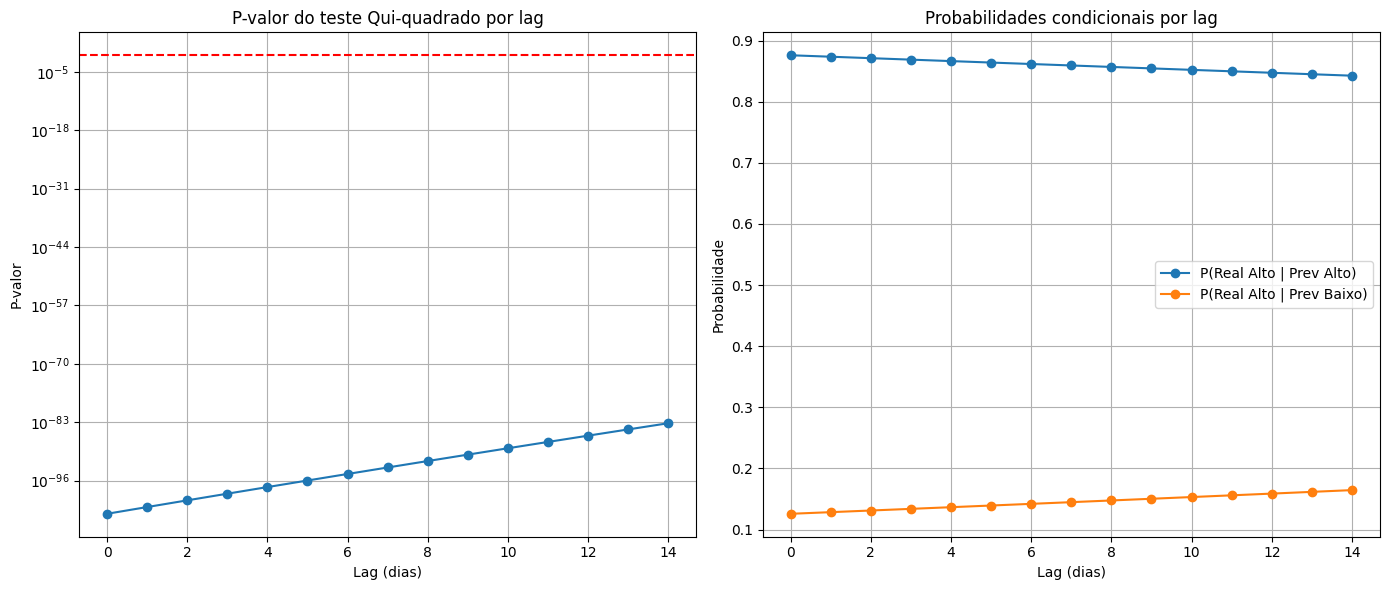

In [72]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Certifique-se de que o DataFrame 'df' está carregado e ordenado por data
df = df.sort_values("data").reset_index(drop=True)

# Variáveis que vamos usar
col_prev = "hospitais_previram_estado_critico"
col_real = "hospitais_relataram_estado_critico"

# Categorizar como alto/baixo usando a mediana para simplificar
mediana_prev = df[col_prev].median()
mediana_real = df[col_real].median()

df["prev_alto"] = df[col_prev] > mediana_prev
df["real_alto"] = df[col_real] > mediana_real

lags = range(0, 15)  # testar lags de 0 a 14 dias

results = []

for lag in lags:
    # Criar a coluna do estado real deslocada por lag (antecipando a previsão)
    df[f"real_alto_lag{lag}"] = df["real_alto"].shift(-lag)

    # Remover linhas com NaN gerados pelo shift
    df_lag = df.dropna(subset=[f"real_alto_lag{lag}", "prev_alto"])

    # Tabela de contingência
    tabela = pd.crosstab(df_lag["prev_alto"], df_lag[f"real_alto_lag{lag}"])

    # Teste Qui-quadrado
    chi2, p, dof, ex = chi2_contingency(tabela)

    # Probabilidades condicionais
    p_real_alto_dado_prev_alto = tabela.loc[True, True] / tabela.loc[True].sum() if True in tabela.index and True in tabela.columns else np.nan
    p_real_alto_dado_prev_baixo = tabela.loc[False, True] / tabela.loc[False].sum() if False in tabela.index and True in tabela.columns else np.nan

    results.append({
        "lag": lag,
        "chi2": chi2,
        "p_valor": p,
        "p_real_alto_dado_prev_alto": p_real_alto_dado_prev_alto,
        "p_real_alto_dado_prev_baixo": p_real_alto_dado_prev_baixo,
        "tabela": tabela
    })

# Mostrar resultado resumido
df_results = pd.DataFrame(results)
print(df_results[["lag", "chi2", "p_valor", "p_real_alto_dado_prev_alto", "p_real_alto_dado_prev_baixo"]])

# Gráfico da significância e probabilidades condicionais
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(df_results["lag"], df_results["p_valor"], marker='o')
plt.axhline(0.05, color='red', linestyle='--')
plt.title("P-valor do teste Qui-quadrado por lag")
plt.xlabel("Lag (dias)")
plt.ylabel("P-valor")
plt.yscale('log')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(df_results["lag"], df_results["p_real_alto_dado_prev_alto"], marker='o', label="P(Real Alto | Prev Alto)")
plt.plot(df_results["lag"], df_results["p_real_alto_dado_prev_baixo"], marker='o', label="P(Real Alto | Prev Baixo)")
plt.title("Probabilidades condicionais por lag")
plt.xlabel("Lag (dias)")
plt.ylabel("Probabilidade")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [81]:
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

# Separando os grupos
grupo_prev_sim = df[df["hospitais_previram_estado_critico"] == True]["mortes_covid"]
grupo_prev_nao = df[df["hospitais_previram_estado_critico"] == False]["mortes_covid"]

# Teste de Mann-Whitney U
stat, p_valor = mannwhitneyu(grupo_prev_sim, grupo_prev_nao, alternative="two-sided")

# Estatísticas descritivas
media_prev_sim = grupo_prev_sim.mean()
media_prev_nao = grupo_prev_nao.mean()

print("🔍 Análise da relação entre previsão e mortes por COVID:")
print(f"📉 Média de mortes com previsão: {media_prev_sim:.2f}")
print(f"📈 Média de mortes sem previsão: {media_prev_nao:.2f}")
print(f"🧪 Teste de Mann-Whitney U: estatística = {stat:.2f}, p-valor = {p_valor:.4f}")

if p_valor < 0.05:
    print("✅ Diferença significativa entre os grupos (p < 0.05)")
else:
    print("⚠️ Sem evidência de diferença significativa (p ≥ 0.05)")

# Gráfico
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="hospitais_previram_estado_critico", y="mortes_covid", palette="Set2")
plt.title("Distribuição de Mortes por Previsão de Estado Crítico")
plt.xlabel("Hospitais Previram Estado Crítico")
plt.ylabel("Mortes por COVID")
plt.tight_layout()
plt.show()


🔍 Análise com lag de 7 dias entre previsão e mortes por COVID:
📉 Média de mortes após previsão: 2727.00
📈 Média de mortes sem previsão: 730.99
🧪 Teste de Mann-Whitney U: estatística = 66.00, p-valor = 0.1030
⚠️ Sem evidência de diferença significativa (p ≥ 0.05)


    lag  media_mortes_com_prev  media_mortes_sem_prev   p_valor
5     6                 2729.0             688.119403  0.092657
7     8                 2767.0             773.283582  0.092682
10   11                 2795.0             893.820896  0.092697
9    10                 2782.0             853.955224  0.092697
6     7                 2727.0             730.985075  0.102983


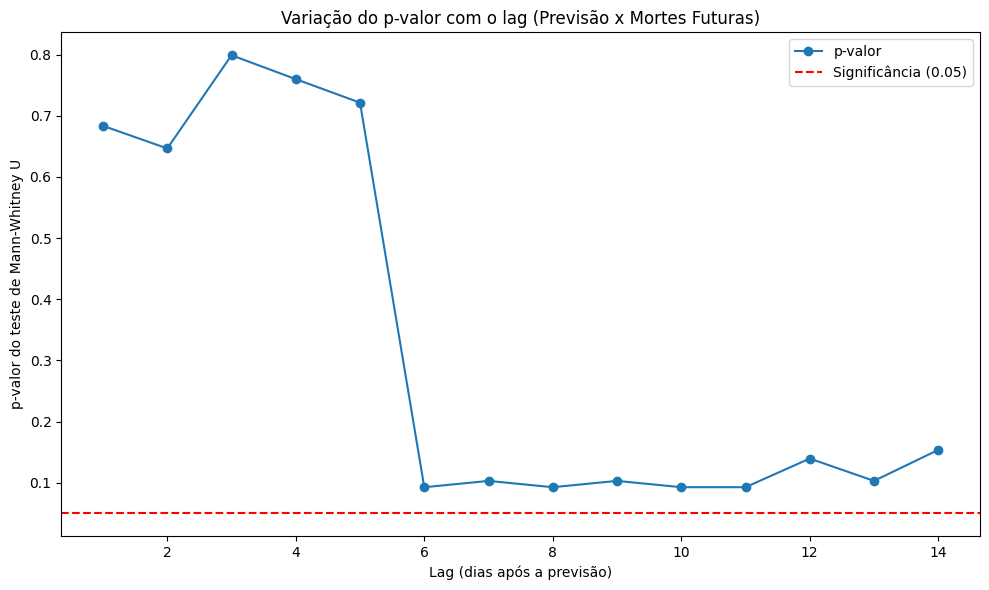

In [86]:
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

# Defina o lag desejado (em dias)
lag = 7

# Garante ordenação correta
df = df.sort_values("data").reset_index(drop=True)

# Cria a coluna de mortes com lag
df["mortes_lag"] = df["mortes_covid"].shift(-lag)

# Remove valores nulos gerados pelo shift
df_lag = df.dropna(subset=["mortes_lag"])

# Separa os grupos com base na previsão
grupo_prev_sim = df_lag[df_lag["hospitais_previram_estado_critico"] == True]["mortes_lag"]
grupo_prev_nao = df_lag[df_lag["hospitais_previram_estado_critico"] == False]["mortes_lag"]

# Teste de Mann-Whitney U
stat, p_valor = mannwhitneyu(grupo_prev_sim, grupo_prev_nao, alternative="two-sided")

# Estatísticas descritivas
media_prev_sim = grupo_prev_sim.mean()
media_prev_nao = grupo_prev_nao.mean()

# 📋 Resultados
print(f"🔍 Análise com lag de {lag} dias entre previsão e mortes:")
print(f"📉 Média de mortes (após previsão): {media_prev_sim:.2f}")
print(f"📈 Média de mortes (sem previsão): {media_prev_nao:.2f}")
print(f"🧪 Teste de Mann-Whitney U: estatística = {stat:.2f}, p-valor = {p_valor:.4f}")

if p_valor < 0.05:
    print("✅ Diferença significativa entre os grupos (p < 0.05)")
else:
    print("⚠️ Sem evidência de diferença significativa (p ≥ 0.05)")



🔍 Análise com lag de 7 dias entre previsão e mortes:
📉 Média de mortes (após previsão): 2727.00
📈 Média de mortes (sem previsão): 730.99
🧪 Teste de Mann-Whitney U: estatística = 66.00, p-valor = 0.1030
⚠️ Sem evidência de diferença significativa (p ≥ 0.05)
